In [2]:
import pandas as pd
import numpy as np

In [3]:
import os

In [4]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.decomposition import TruncatedSVD

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Reader, Dataset
from surprise.prediction_algorithms import SVD
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [8]:
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from surprise import Dataset, Reader
from surprise import KNNWithMeans
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv("supermarket_dataset.csv")

In [11]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [12]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [14]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(-1)# fill null values with -1 and change type
df['days_since_prior_order']=df['days_since_prior_order'].astype('int64')

In [15]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


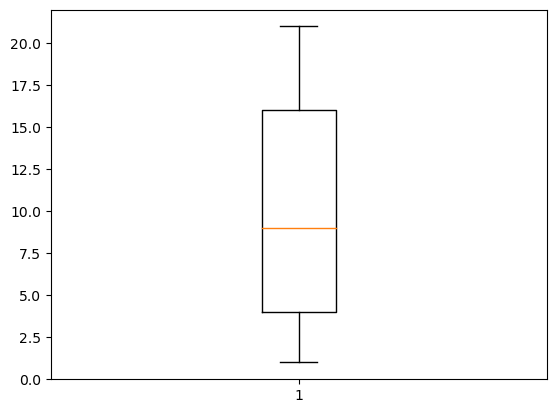

In [17]:
plt.boxplot(df['department_id'])
plt.show()

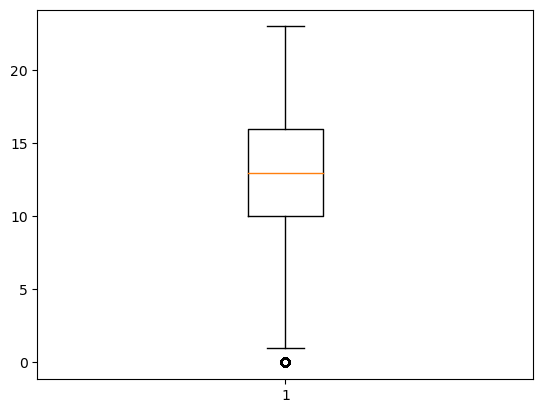

In [18]:
plt.boxplot(df['order_hour_of_day'])
plt.show()

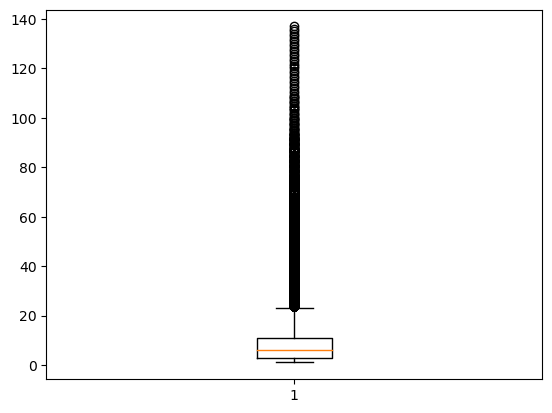

In [19]:
plt.boxplot(df['add_to_cart_order'])
plt.show()

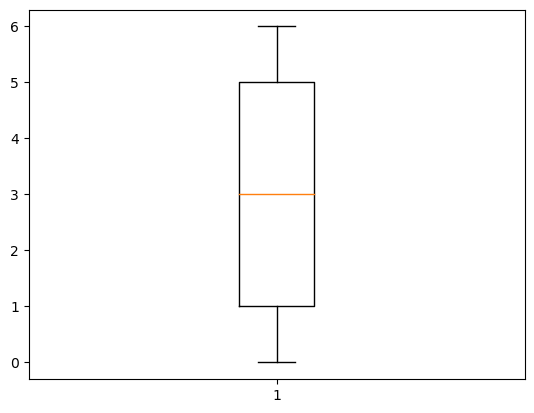

In [20]:
plt.boxplot(df['order_dow'])
plt.show()

In [21]:
# OUTLIER customers based on add_to_cart_order

# group the data by user_id and calculate the mean value for each user
df_mean = df.groupby('user_id').mean()
# calculate the IQR for the addtocart_order feature
Q1 = df_mean['add_to_cart_order'].quantile(0.25)
Q3 = df_mean['add_to_cart_order'].quantile(0.75)
IQR = Q3 - Q1
# find the outlier threshold
outlier_threshold = Q3 + 1.5 * IQR
outlier_customers = df_mean[df_mean['add_to_cart_order'] > outlier_threshold]
#outlier_customers = outlier_customers.reset_index()
outlier_customers

,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
user_id,,,,,,,,,
10,8.339500e+04,4.000000,3.000000,15.000000,14.00000,60.000000,15.500000,0.433333,10.400000
133,2.415920e+05,11.000000,3.000000,13.000000,5.00000,68.133333,15.500000,0.400000,9.033333
197,2.357070e+05,7.000000,6.000000,14.000000,6.00000,74.206897,15.000000,0.793103,11.551724
216,1.500908e+06,5.000000,5.000000,15.000000,24.00000,68.448276,15.000000,0.172414,13.655172
264,3.022479e+06,29.000000,2.000000,9.000000,9.00000,79.551724,15.000000,0.827586,11.103448
...,...,...,...,...,...,...,...,...,...
205789,3.418993e+06,13.000000,6.000000,12.000000,7.00000,63.900000,15.500000,0.600000,9.466667
205926,2.385091e+06,11.000000,1.000000,15.000000,6.00000,73.828571,18.000000,0.514286,10.171429
205956,4.562900e+05,3.000000,3.000000,14.000000,30.00000,69.151515,17.000000,0.303030,10.909091


In [22]:
# OUTLIER customers in the purchases made by each customer

# Group the data by user_id
grouped_data = df.groupby("user_id")["order_number"].agg(["mean", "std"])

# Calculate the lower and upper bounds for outliers
lower_bound = grouped_data["mean"] - 3 * grouped_data["std"]
lower_bound.name = 'order_number_lower'
upper_bound = grouped_data["mean"] + 3 * grouped_data["std"]
upper_bound.name = 'order_number_upper'
# join the lower and upper bounds to the original dataframe on user_id
df = df.join(lower_bound, on='user_id')
df = df.join(upper_bound, on='user_id')
# Identify the outliers
outliers = df[(df["order_number"] < df['order_number_lower']) | (df["order_number"] > df['order_number_upper'])]
outliers

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_number_lower,order_number_upper
2538,677735,175561,2,3,12,16,32,1,0,4,produce,packaged produce,7.467505,52.722971
8764,2018358,185514,22,4,17,17,128,1,0,3,bakery,tortillas flat bread,-5.770319,18.847242
8765,2018358,185514,22,4,17,17,54,2,1,17,household,paper goods,-5.770319,18.847242
15536,2545752,185279,9,5,9,12,84,1,0,16,dairy eggs,milk,10.001293,28.306399
16290,1365995,136421,1,3,10,-1,88,1,0,13,pantry,spreads,1.544766,74.812377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010592,1097536,97028,5,0,16,7,24,1,1,4,produce,fresh fruits,-0.146102,4.574673
2010593,1097536,97028,5,0,16,7,24,2,0,4,produce,fresh fruits,-0.146102,4.574673
2015806,1581072,93695,5,4,17,30,97,1,0,13,pantry,baking supplies decor,3.364384,4.740879
2016905,1373400,139870,11,2,12,30,116,1,0,1,frozen,frozen produce,-2.906531,10.137300


In [23]:
df=df.drop(outlier_customers.index)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_number_lower,order_number_upper
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,-31.921436,69.180695
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,-31.921436,69.180695
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,-31.921436,69.180695
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,-31.921436,69.180695
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,-31.921436,69.180695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,-10.664385,39.180514
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,-27.151701,93.916407
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,-27.151701,93.916407
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,-27.151701,93.916407


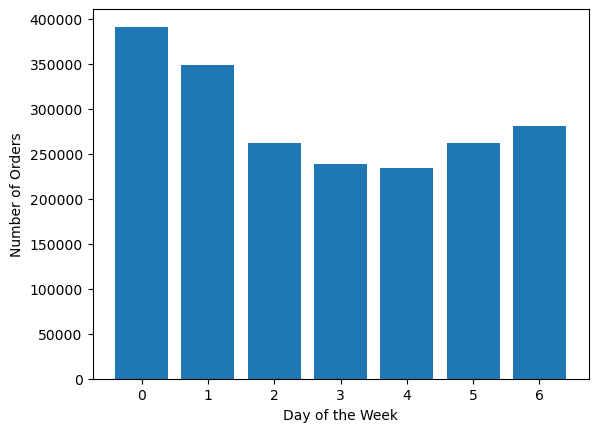

In [24]:

# distribution of orders by day of the week
order_dow_counts = df.groupby('order_dow').size()

plt.bar(order_dow_counts.index, order_dow_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

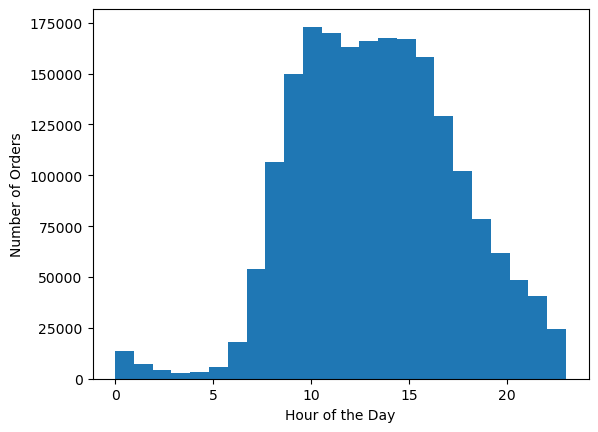

In [25]:
# distribution of orders by hour of the day
plt.hist(df['order_hour_of_day'], bins=24)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

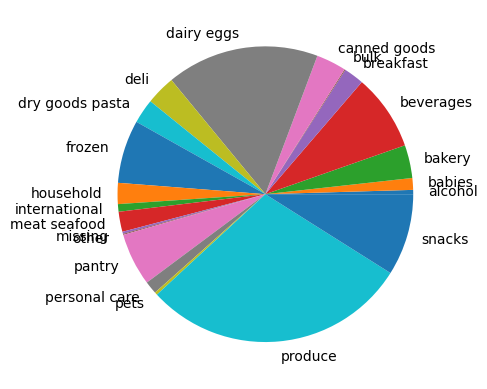

In [26]:
# distribution of orders by department
department_counts = df.groupby('department').size()
plt.pie(department_counts.values, labels=department_counts.index)
plt.show()

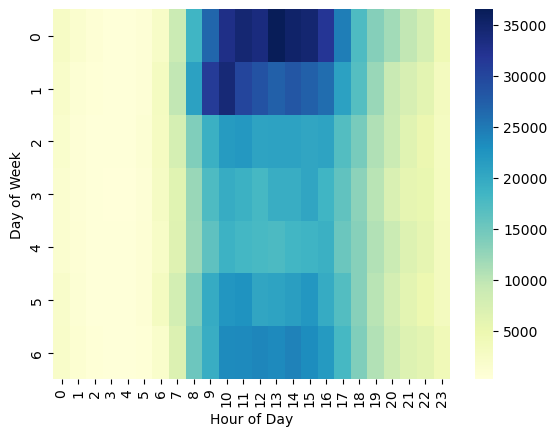

In [27]:
# relationship between the day of the week and hour of the day for orders
pivot = df.pivot_table(values='order_id', index='order_dow', columns='order_hour_of_day', aggfunc='count')
sns.heatmap(pivot, cmap='YlGnBu')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

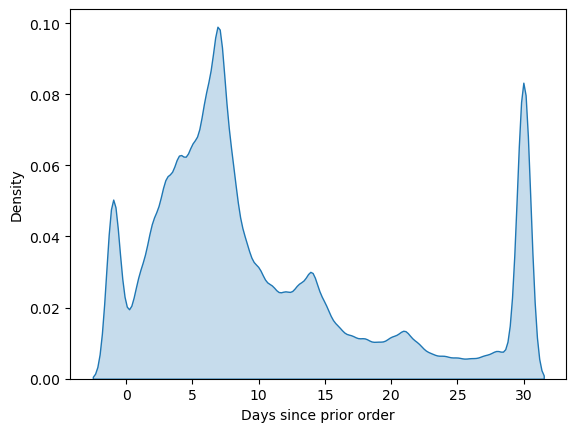

In [28]:
# distribution of days since prior order
sns.kdeplot(df['days_since_prior_order'], shade=True)
plt.xlabel('Days since prior order')
plt.show()

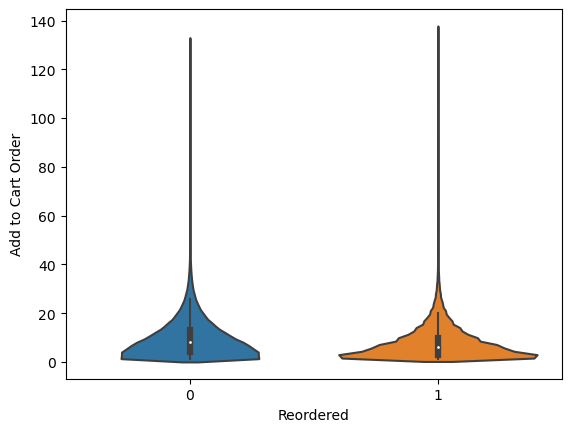

In [29]:
# relationship between the number of items added to cart and the reorder status
sns.violinplot(x='reordered', y='add_to_cart_order', data=df)
plt.xlabel('Reordered')
plt.ylabel('Add to Cart Order')
plt.show()

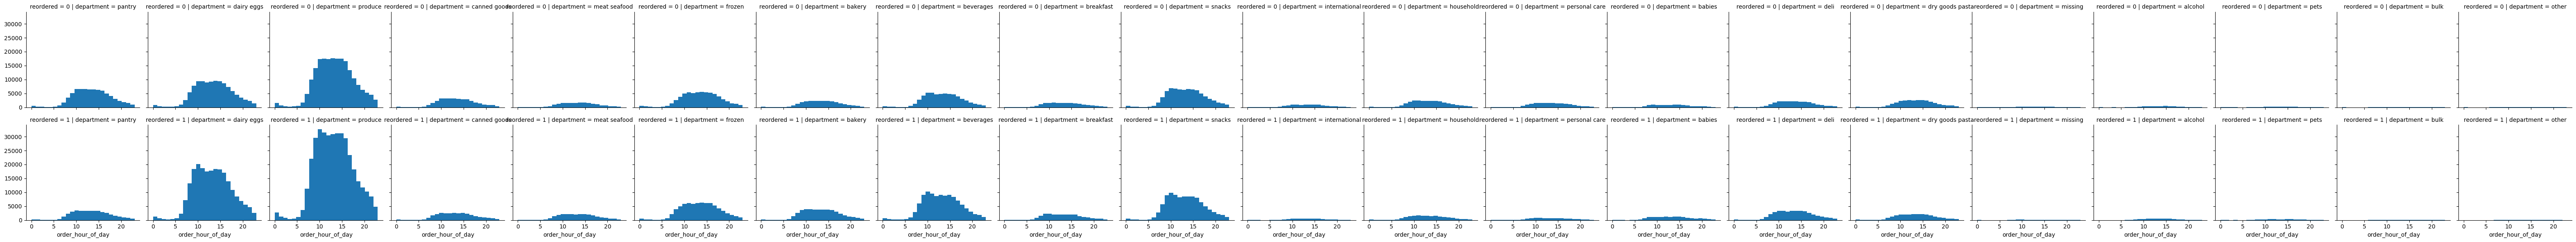

In [30]:
# distribution of reorders by department and hour of the day
g = sns.FacetGrid(df, col="department", row="reordered")
g = g.map(plt.hist, "order_hour_of_day",  bins=24)
plt.show()

In [31]:
# 1 Product Reorder Prediction

# Group the data by user_id and product_id, calculating the mean of the 'reordered' column for each group
reorder_prob = df.groupby(['user_id','product_id'])['reordered'].mean().reset_index()
# Rename the columns
reorder_prob = reorder_prob.rename(columns={'reordered':'reorder_prob'})
reorder_prob

,user_id,product_id,reorder_prob
0,2,1,0.000000
1,2,21,0.000000
2,2,23,1.000000
3,2,24,0.666667
4,2,67,0.000000
...,...,...,...
1108531,206209,112,0.500000
1108532,206209,116,0.000000
1108533,206209,120,0.000000
1108534,206209,121,0.000000


In [32]:
# 2 Department Popularity

# Count number of products ordered per department
department_popularity = df.groupby('department')['product_id'].count().reset_index()
# Rename the column
department_popularity = department_popularity.rename(columns={'product_id':'product_count'})
# Sort the data by product_count
department_popularity = department_popularity.sort_values('product_count', ascending=False)
department_popularity

,department,product_count
19,produce,588125
7,dairy eggs,336440
20,snacks,180450
3,beverages,167909
10,frozen,139316
16,pantry,116101
2,bakery,72881
6,canned goods,65951
8,deli,65059
9,dry goods pasta,53956


In [33]:
# 3 Product Affinity

# Prepare the data for the Apriori algorithm
basket = (df.groupby(['order_id', 'product_name'])['product_name']
          .count().unstack().reset_index().fillna(0)
          .set_index('order_id'))
basket_sets = basket.applymap(lambda x: 0 if x<=0 else 1)


In [34]:
basket_sets = basket_sets.sample(frac=0.01)# Take a sample

In [35]:
# Run the Apriori algorithm to find frequent item sets
frequent_itemsets = apriori(basket_sets, min_support=0.005, use_colnames=True)


In [36]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
frequent_itemsets

,support,itemsets
0,0.0055,(air fresheners candles)
1,0.0375,(asian foods)
2,0.0520,(baby food formula)
3,0.0100,(bakery desserts)
4,0.0780,(baking ingredients)
...,...,...
14363,0.0085,"(fresh vegetables, fresh fruits, packaged vege..."
14364,0.0050,"(water seltzer sparkling water, fresh vegetabl..."
14365,0.0060,"(other creams cheeses, fresh vegetables, fresh..."
14366,0.0055,"(fresh vegetables, refrigerated, fresh fruits,..."


In [37]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(asian foods),(bread),0.0375,0.1740,0.0095,0.253333,1.455939,0.002975,1.106250
1,(bread),(asian foods),0.1740,0.0375,0.0095,0.054598,1.455939,0.002975,1.018085
2,(canned jarred vegetables),(asian foods),0.0740,0.0375,0.0055,0.074324,1.981982,0.002725,1.039781
3,(asian foods),(canned jarred vegetables),0.0375,0.0740,0.0055,0.146667,1.981982,0.002725,1.085156
4,(asian foods),(cereal),0.0375,0.0840,0.0055,0.146667,1.746032,0.002350,1.073438
...,...,...,...,...,...,...,...,...,...
193747,(fresh fruits),"(water seltzer sparkling water, fresh vegetabl...",0.5505,0.0055,0.0055,0.009991,1.816530,0.002472,1.004536
193748,(packaged vegetables fruits),"(water seltzer sparkling water, fresh vegetabl...",0.3660,0.0065,0.0055,0.015027,2.311896,0.003121,1.008657
193749,(soy lactosefree),"(water seltzer sparkling water, fresh vegetabl...",0.1700,0.0125,0.0055,0.032353,2.588235,0.003375,1.020517
193750,(packaged cheese),"(water seltzer sparkling water, fresh vegetabl...",0.2480,0.0085,0.0055,0.022177,2.609108,0.003392,1.013988


In [38]:
# 4 for finding similar product which customers has reordered


# Define a reader object
reader = Reader(rating_scale=(1, 1))
# Load the data into a Dataset object
data = Dataset.load_from_df(df[['user_id', 'product_id', 'reordered']], reader)
# Split the data into training and test sets
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25, random_state=123)
# Train the model
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)
# Make recommendations for a specific product ID
user_id = 2
n_recommendations = 10
predictions = algo.get_neighbors(user_id, k=n_recommendations)
predictions

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


[104, 132, 26, 84, 124, 54, 110, 103, 75, 17]

In [39]:
# 5 Churn Prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Prepare the data
df_churn = df.groupby('user_id').agg({'order_number':'max','days_since_prior_order':'mean'}).reset_index()
df_churn['churn'] = (df_churn['order_number'] < df_churn['order_number'].quantile(0.1)).astype(int)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_churn[['days_since_prior_order']], df_churn['churn'], test_size=0.2, random_state=123)
clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=123)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)

y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [40]:
num_churn = sum(y_pred)
print("Number of churn: ", num_churn)

Number of churn:  1193


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)


In [42]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

